In [1]:
import numpy as np
import h5py
import json
import sys
sys.path.append('F:/Linux')
sys.path.append("C:/Users/qq651/OneDrive/Codes/A2project/")
import illustris_python as il
import matplotlib.pyplot as plt
from plotTools.plot import *


il1_A2list = np.load('f:/Linux/localRUN/il1_A2dict(135-68_21part).npy', allow_pickle=1).item()
tng_A2list = np.load('f:/Linux/localRUN/tng_A2dict(99-33_21part).npy', allow_pickle=1).item()
tng_zformation = np.load('f:/Linux/localRUN/tng_zformation.npy', allow_pickle=1).item()
il1_zformation = np.load('f:/Linux/localRUN/il1_zformation.npy', allow_pickle=1).item()

il1_barID = np.load('f:/Linux/localRUN/barredID_il1.npy')
il1_diskID = np.load('f:/Linux/localRUN/diskID_il1.npy')

tng_barID = np.load('f:/Linux/localRUN/barredID_4WP_TNG.npy')
tng_diskID = np.load('f:/Linux/localRUN/diskID_4WP.npy')

'''
Rs   il1   TNG
0.0: [135, 99],
0.1: [127, 91],
0.2: [120, 84],
0.3: [113, 78],
0.4: [108, 72],
0.5: [103, 67],
0.6: [99, 63],
0.7: [95, 59],
0.8: [92, 56],
0.9: [89, 53],
1.0: [85, 50],
1.1: [82, 47],
1.2: [80, 45],
1.3: [78, 43],
1.4: [76, 41],  
1.5: [75, 40],
1.6: [73, 38],
1.7: [71, 36],
1.8: [70, 35],
1.9: [69, 34],
2.0: [68, 33],
2.5: [64, 29],
3.0: [60, 25]
'''

il1_snap = np.array([135, 127, 120, 113, 108, 103, 99, 95, 92, 89, 85, 82, 80, 78, 76, 75, 73, 71, 70, 69, 68])
tng_snap = np.array([99, 91, 84, 78, 72, 67, 63, 59, 56, 53, 50, 47, 45, 43, 41, 40, 38, 36, 35, 34, 33])
Redshift = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])

il1_tbar = []
tng_tbar = []

il1_id = []
tng_id = []

for i in il1_A2list.keys():
    il1_tbar.append(zbar(i, il1_A2list))
    prog = LoadMergHist('il1', i)[0]
    try:
        il1_id.append(prog[68])
    except KeyError:
        continue


for i in tng_A2list.keys():
    prog = LoadMergHist('TNG', i)[0]
    try:
        tng_id.append(prog[33])
        tng_tbar.append(zbar(i, tng_A2list))
    except KeyError:
        continue


mas = il.func.loadSubhalos('TNG', 33, 'SubhaloMassInHalfRadType')
Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
Gf[np.isnan(Gf)] = 0
tng_gf = Gf


mas = il.func.loadSubhalos('il1', 68, 'SubhaloMassInHalfRadType')
Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
Gf[np.isnan(Gf)] = 0
il1_gf = Gf

il1_tbar = np.array(il1_tbar)
tng_tbar = np.array(tng_tbar)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in true_divide
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


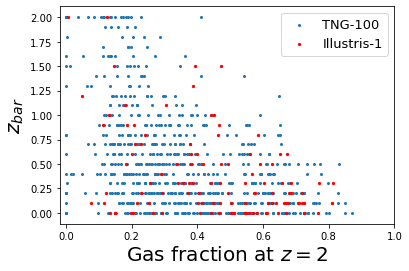

In [4]:
    plt.scatter(tng_gf[tng_id], tng_tbar, s=4, label='TNG-100')
    plt.scatter(il1_gf[il1_id], il1_tbar, s=5, color='r', label='Illustris-1')


    plt.xlabel('Gas fraction at $z=2$', fontsize = 20)
    plt.ylabel(r'$z_{bar}$', fontsize = 20)
    plt.xlim(-0.02, 1)
    plt.legend(fontsize = 13)
    
    plt.savefig('F:/Linux/local_result/zbar/zbar.pdf')

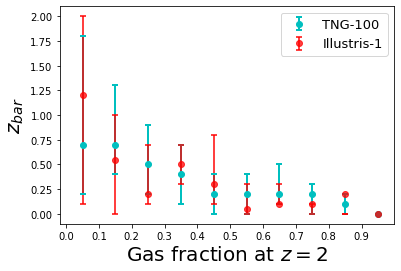

In [6]:
    tng_dots = np.vstack((tng_gf[tng_id], tng_tbar))
    il1_dots = np.vstack((il1_gf[il1_id], il1_tbar))

    bins = np.linspace(0, 1, 11)
    tng_plotdata = [[], [], []]
    for i in range(10):
        mask = (tng_dots[0, :] >= bins[i]) & (tng_dots[0, :] < bins[i + 1])
        tmp = tng_dots[1, :][mask]
        d0, d1, d2 = ErrorBarMedian(tmp)
        tng_plotdata[0].append(d0)
        tng_plotdata[1].append(d1)
        tng_plotdata[2].append(d2)
    tng_plotdata = np.array(tng_plotdata)
    tng_Err = np.vstack((tng_plotdata[1, :] - tng_plotdata[0, :], tng_plotdata[2, :] - tng_plotdata[1, :]))

    il1_plotdata = [[], [], []]
    for i in range(10):
        mask = (il1_dots[0, :] >= bins[i]) & (il1_dots[0, :] < bins[i + 1])
        tmp = il1_dots[1, :][mask]
        d0, d1, d2 = ErrorBarMedian(tmp)
        il1_plotdata[0].append(d0)
        il1_plotdata[1].append(d1)
        il1_plotdata[2].append(d2)
    il1_plotdata = np.array(il1_plotdata)
    il1_Err = np.vstack((il1_plotdata[1, :] - il1_plotdata[0, :], il1_plotdata[2, :] - il1_plotdata[1, :]))

    plt.errorbar(bins[:-1] + 0.05, tng_plotdata[1, :], yerr = tng_Err, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='TNG-100')
    plt.errorbar(bins[:-1] + 0.05, il1_plotdata[1, :], yerr=il1_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Illustris-1', alpha=0.75)

    plt.xlim(-0.02, 1)
    #plt.title('Statistics of zbar in each bin')
    plt.xlabel('Gas fraction at $z=2$', fontsize = 20)
    plt.ylabel(r'$z_{bar}$', fontsize = 20)
    plt.xticks(bins[:-1])
    plt.legend(fontsize = 13)
    plt.savefig('F:/Linux/local_result/zbar/zbar_err.pdf')

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


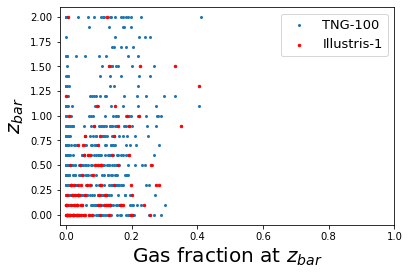

In [8]:
    tng_gf = {}
    for snap in tng_snap:
        mas = il.func.loadSubhalos('TNG', snap, 'SubhaloMassInHalfRadType')
        Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
        Gf[np.isnan(Gf)] = 0
        tng_gf[snap] = Gf
    il1_gf = {}
    for snap in il1_snap:
        mas = il.func.loadSubhalos('il1', snap, 'SubhaloMassInHalfRadType')
        Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
        Gf[np.isnan(Gf)] = 0
        il1_gf[snap] = Gf

    tng_plotdata = [[], []]
    for haloID in tng_barID:
        ind = np.where(Redshift == zbar(haloID, tng_A2list))[0][0]
        snap = tng_snap[ind]
        prog = LoadMergHist('TNG', haloID)[0]
        try:
            subID = prog[snap]
        except KeyError:
            continue
        tng_plotdata[0].append(tng_gf[snap][subID])
        tng_plotdata[1].append(zbar(haloID, tng_A2list))

    il1_plotdata = [[], []]
    for haloID in il1_barID:
        ind = np.where(Redshift == zbar(haloID, il1_A2list))[0][0]
        snap = il1_snap[ind]
        prog = LoadMergHist('il1', haloID)[0]
        try:
            subID = prog[snap]
        except KeyError:
            continue
        il1_plotdata[0].append(il1_gf[snap][subID])
        il1_plotdata[1].append(zbar(haloID, il1_A2list))
    
    plt.scatter(tng_plotdata[0], tng_plotdata[1], s=4, label='TNG-100')
    plt.scatter(il1_plotdata[0], il1_plotdata[1], s=6, color='r', label='Illustris-1')


    plt.xlabel(r'Gas fraction at $z_{bar}$', fontsize = 20)
    plt.ylabel(r'$z_{bar}$', fontsize = 20)
    plt.xlim(-0.02, 1.0)
    plt.ylim(-0.1, 2.1)
    plt.legend(fontsize = 13)
    plt.savefig('F:/Linux/local_result/zbar/zBarFormed.pdf')